# Iris Dataset - Exploratory Data Analysis

__*Author Name*__: Venkat Teja Nallamothu 

__*Purpose*__: Creating a new Juypter notebook and to learn to use Jupyter and EDA.

__*Date*__: 09/17/2025

#### 1.  Imports

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib 

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

#### 2. Load Data

##### Loading the Iris dataset into pandas DataFrame

In [54]:
iris_df: pd.DataFrame = sns.load_dataset('iris')

#####  List of column names

In [55]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##### Inspecting the first few rows of the DataFrame

In [56]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 3. Initial Data Inspection

##### Specifying the number of rows to display from the dataframe

In [57]:
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


##### Getting the shape to see the dimensions of the dataframe

In [58]:
iris_df.shape

(150, 5)

##### Inspecting the data types of the columns with dtypes() method

In [59]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

##### Inspecting the data types of the columns with info() method

In [60]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 4. Initial Descriptive Statistics

##### Inspecting the summary statistics for numerical columns

In [61]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 5A. Initial Data Distribution for Numerical Columns

##### Inspecting the histogram by one numerical column


<Axes: >

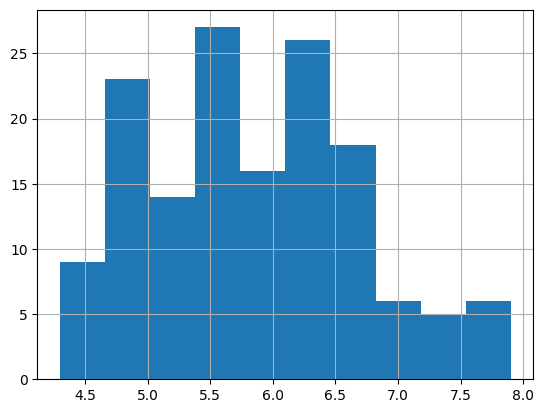

In [62]:
iris_df['sepal_length'].hist()

##### Interpretation: Sepal length distribution

The histogram above shows the distribution of `sepal_length` across the entire Iris dataset. Key points to note:

- Shape: the distribution is approximately symmetric (approximately normal distributuions slight right skew).

##### Inspecting all histograms for all numerical columns


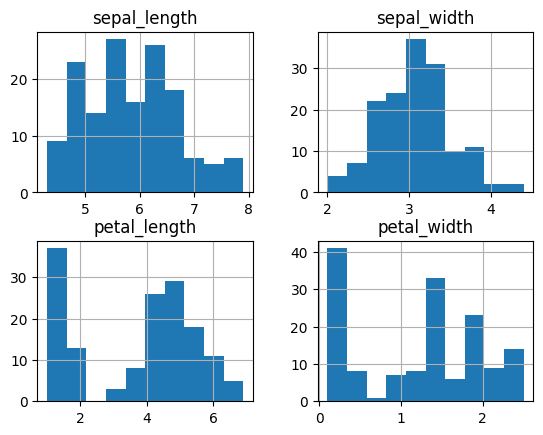

In [63]:
iris_df.hist()

matplotlib.pyplot.show()


Using Seaborn plot to get hue so, species can be differentiated better

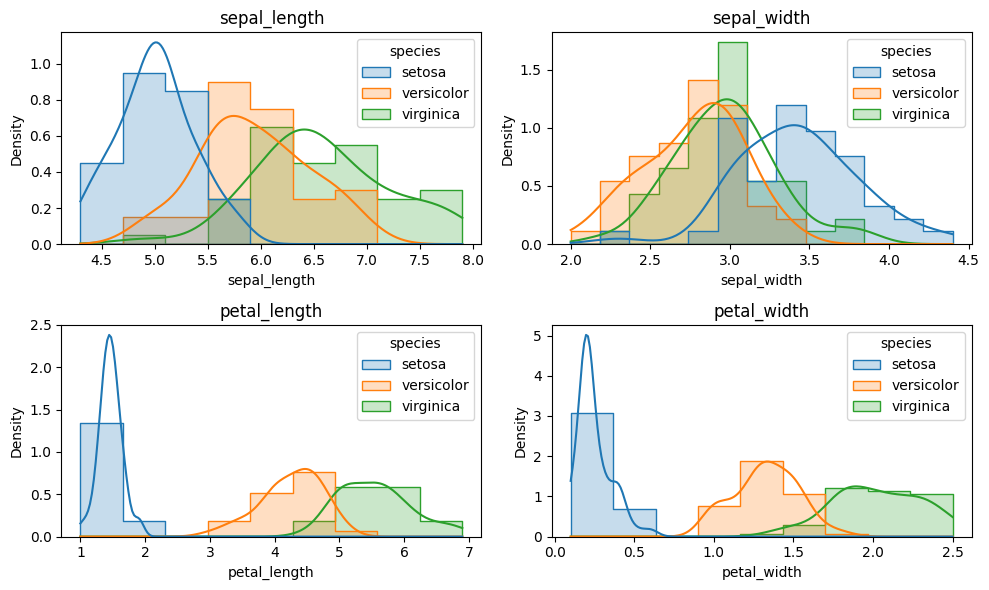

In [64]:
import matplotlib.pyplot as plt
numeric_cols = iris_df.select_dtypes(include='number').columns.tolist()
n = len(numeric_cols)
cols = 2
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(data=iris_df, x=col, hue='species', kde=True, ax=ax, element='step', stat='density', common_norm=False)
    ax.set_title(col)

# turn off any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


##### Observations from species-colored histograms

- `sepal_length`: Distinct modes are visible between species — setosa tends to have smaller sepal lengths, versicolor is intermediate, and virginica larger values.
- `sepal_width`: Overlap exists across species, though setosa typically shows slightly larger sepal widths on average; distributions are less separable than petal measurements.
- `petal_length` and `petal_width`: These features separate species very well — setosa has much smaller petal sizes while versicolor and virginica form progressively larger distributions.
- Overall: Petal measurements are most informative for distinguishing species; sepal measurements provide weaker separation but still show species-dependent shifts.

#### 5B. Initial Data Distribution for Categorical Columns

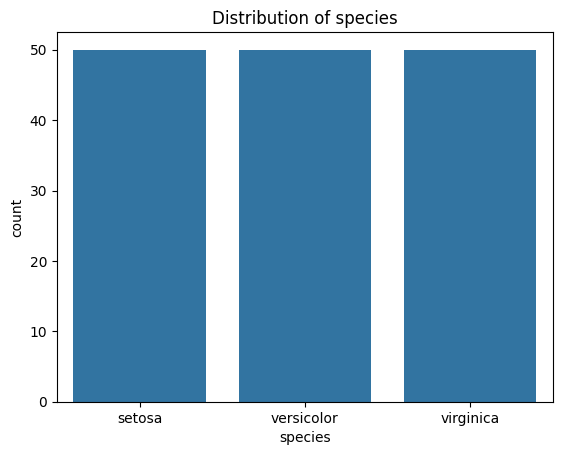

In [65]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
iris_df['species'].value_counts()

# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

the above bar plot shows that all the sample for each of the species are evenly distributed with all of them having 50 samples each.

#### 6. Initial Data Transformation and Feature Engineering

##### Checking for nulls/NAs in the dataset

In [66]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Observation: The dataset seems complete with no null or missing values

##### Checking for Duplicates

In [67]:
iris_df.duplicated().sum()

np.int64(1)

In [68]:
duplicates = iris_df[iris_df.duplicated(keep=False)].sort_values(iris_df.columns.tolist())
print(duplicates)

     sepal_length  sepal_width  petal_length  petal_width    species
101           5.8          2.7           5.1          1.9  virginica
142           5.8          2.7           5.1          1.9  virginica


In [69]:
iris_df_clean = iris_df.drop_duplicates().reset_index(drop=True)

In [70]:
iris_df_clean.shape

(149, 5)

Observation: Found 1 duplicate pair in the dataframe so removed that from the dataset

##### Replaced whitespaces with underscores in column names for better readability 

In [71]:
# Show columns before renaming
print("Before renaming:", iris_df_clean.columns.tolist())

# Rename columns: replace whitespaces with underscores
iris_df_clean.columns = iris_df_clean.columns.str.replace(' ', '_')

# Show columns after renaming
print("After renaming:", iris_df_clean.columns.tolist())

Before renaming: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
After renaming: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


##### Adding new Columns

In [72]:
iris_df_clean['sepal_area'] = iris_df_clean['sepal_length'] * iris_df_clean['sepal_width']

In [73]:
iris_df_clean.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


####  7. Initial Visualizations

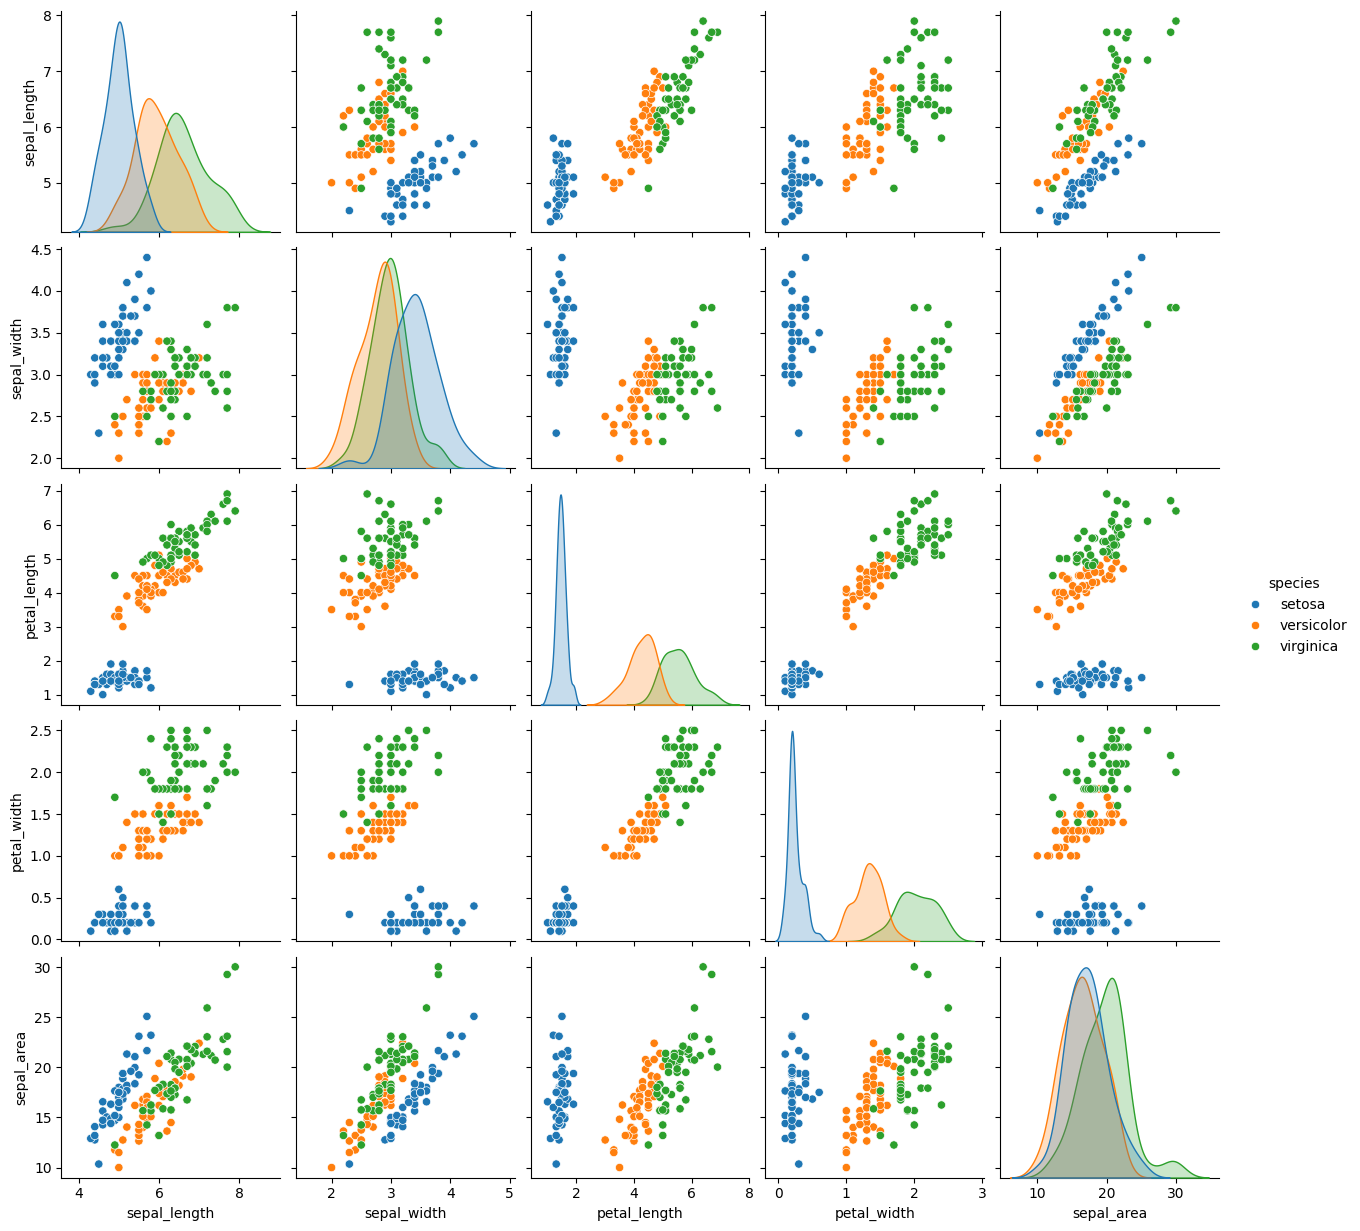

In [74]:
sns.pairplot(iris_df_clean, hue='species')

# Show all plots
matplotlib.pyplot.show()

##### Observations 1
* Diagonal distributions show clear tri-modal patterns, especially for petal measurements
* Petal Length vs. Petal Width (bottom row, 4th panel) shows the cleanest species separation with minimal overlap
* Sepal Width shows the most overlap across species in all scatter combinations
Setosa forms distinct clusters in ALL pairwise combinations - easiest to classify
* Petal measurements create the strongest discriminative boundaries between all three species
* Sepal Area (bottom row) behaves similarly to sepal length relationships, confirming its redundancy

Takeaway: This pairplot confirms that petal features are the powerhouse variables for species classification, while sepal features (including the engineered sepal area) provide supporting but less decisive information.

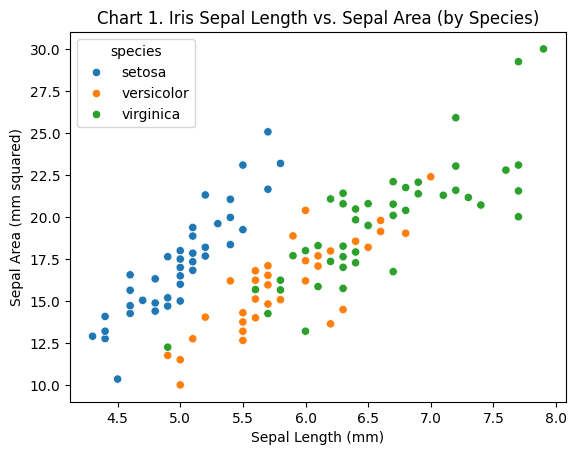

In [75]:
# A scatter plot is a plot of two numerical variables.
scatter_plt: Axes = sns.scatterplot(
    data=iris_df_clean, x="sepal_length", y="sepal_area", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

matplotlib.pyplot.show()

##### Observations 2

* Strong positive correlation between Sepal Length and Sepal Area across all species
* Setosa (blue) clusters in the lower-left region with smaller measurements
* Virginica (green) dominates the upper-right with larger sepal dimensions
* Versicolor (orange) occupies the middle ground with moderate overlap
* Linear relationship suggests Sepal Area is largely determined by Sepal Length
* Species separation exists but with notable overlap, especially between versicolor and virginica

Takeaway: Sepal Area provides incremental discriminative power but isn't revolutionary since it's highly correlated with length. The engineered feature confirms existing patterns rather than revealing new ones.

# 8. Initial **Iris Dataset Analysis Summary**

## **Dataset Overview**
**150 samples**, 3 species (`setosa`, `versicolor`, `virginica`), 4 numeric features (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) plus species.

## **📊 Data Quality**
- **Missing values**: None detected ✅
- **Duplicates**: One pair found and removed ✅  
- **Class balance**: Perfect (50 samples each) ✅

## **🔍 Univariate Patterns**
- **🎯 Strong discriminators**: `petal_length` and `petal_width` show clear, separated distributions by species
- **⚠️ Moderate separator**: `sepal_length` shows partial separation  
- **❌ Weak separator**: `sepal_width` overlaps substantially across species

## **⚙️ Engineered Feature**
- **`sepal_area`** = `sepal_length` × `sepal_width`
- Strongly correlated with `sepal_length`
- Provides only modest extra separation by itself

## **🔗 Multivariate Relationships**
- **Pairwise plots confirm**: Petal measurements create the cleanest species separation
- **Species clustering**: Setosa distinct; versicolor/virginica overlap more
- **Correlation structure**: Some redundancy among features → inspect `iris_df.corr()`

## **🤖 Modeling Implications**
**Baseline strategy**: Start with petal features only
- Expect **high accuracy** with simple classifiers (Logistic Regression/Decision Tree)
- Adding sepal features and `sepal_area` may give small improvements

## 📋 **Takeaways**
Petal measurements are the strongest predictors for species classification. The dataset is clean and balanced, so simple baseline models should perform well and provide an excellent starting point for further modeling and feature exploration.

## **Next Steps: Logistic Regression Classification**

**Implement logistic regression** as the baseline classifier. 
Start with **petal features only** (`petal_length`, `petal_width`) to establish a strong baseline, then incrementally add sepal features to measure improvement. 

Evaluate performance using **accuracy score**, **confusion matrix**, and **classification report** to assess per-class precision/recall. 
Use **cross-validation** (5-fold) for robust performance estimates given the small dataset size. 

Finally, examine **feature coefficients** to interpret which measurements most strongly influence species predictions, and visualize **decision boundaries** using a 2D plot of the two strongest features. This approach should yield **>95% accuracy** and provide clear insights into feature importance for iris species classification.